In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('C:/Sales/covid_19_Data.csv')

In [3]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [4]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [5]:
df.head()

ObservationDate Province/State  Country/Region  Confirmed  Deaths  Recovered
0      01/22/2020          Anhui  Mainland China        1.0     0.0        0.0
1      01/22/2020        Beijing  Mainland China       14.0     0.0        0.0
2      01/22/2020      Chongqing  Mainland China        6.0     0.0        0.0
3      01/22/2020         Fujian  Mainland China        1.0     0.0        0.0
4      01/22/2020          Gansu  Mainland China        0.0     0.0        0.0

In [6]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [7]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [10]:
df.describe()

Confirmed         Deaths     Recovered
count  3.064290e+05  306429.000000  3.064290e+05
mean   8.567091e+04    2036.403268  5.042029e+04
std    2.775516e+05    6410.938048  2.015124e+05
min   -3.028440e+05    -178.000000 -8.544050e+05
25%    1.042000e+03      13.000000  1.100000e+01
50%    1.037500e+04     192.000000  1.751000e+03
75%    5.075200e+04    1322.000000  2.027000e+04
max    5.863138e+06  112385.000000  6.399531e+06

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   Province   228329 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [12]:
df = df.fillna('NA')

In [13]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [14]:
df2 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [15]:
df2.head()

Country   Confirmed    Deaths   Recovered
0       Azerbaijan         1.0       0.0         0.0
1  ('St. Martin',)         2.0       0.0         0.0
2      Afghanistan  17026442.0  669075.0  13464399.0
3          Albania  19768869.0  375955.0  13945256.0
4          Algeria  27684358.0  834464.0  18959299.0

In [16]:
df2 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [17]:
df2.head()

Country       Date  Confirmed  Deaths  Recovered
0       Azerbaijan 2020-02-28        1.0     0.0        0.0
1  ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2      Afghanistan 2020-02-24        1.0     0.0        0.0
3      Afghanistan 2020-02-25        1.0     0.0        0.0
4      Afghanistan 2020-02-26        1.0     0.0        0.0

In [18]:
df3 = df2[df2['Confirmed']>100]

In [19]:
df3.head()

Country       Date  Confirmed  Deaths  Recovered
35  Afghanistan 2020-03-28      107.0     4.0        2.0
36  Afghanistan 2020-03-29      118.0     4.0        2.0
37  Afghanistan 2020-03-30      146.0     4.0        2.0
38  Afghanistan 2020-03-31      175.0     4.0        5.0
39  Afghanistan 2020-04-01      197.0     4.0        5.0

In [20]:
import matplotlib.pyplot as plt
import numpy as np

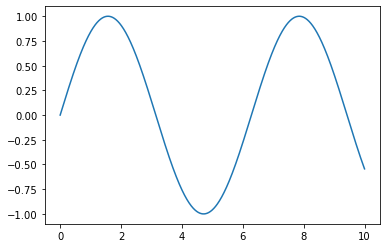

In [21]:
x = np.linspace(0,10,1000)
y = np.sin(x)
plt.plot(x,y)
plt.show()

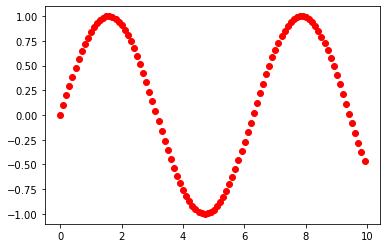

In [22]:
plt.scatter(x[::10],y[::10],color='red')
plt.show()

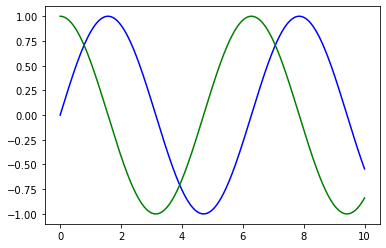

In [23]:
plt.plot(x,y,color='b')
plt.plot(x,np.cos(x),color='g')
plt.show()

In [24]:
countries = df3['Country'].unique()
len(countries)

186

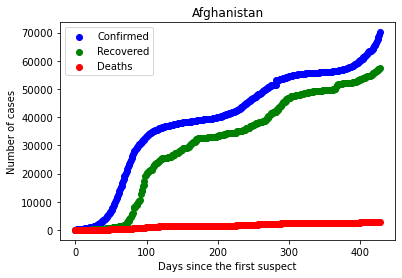

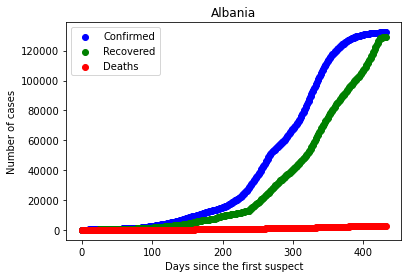

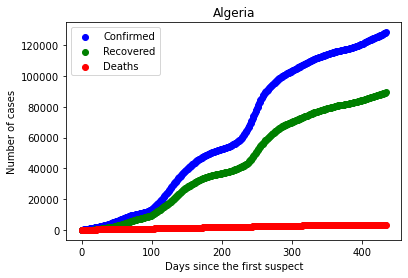

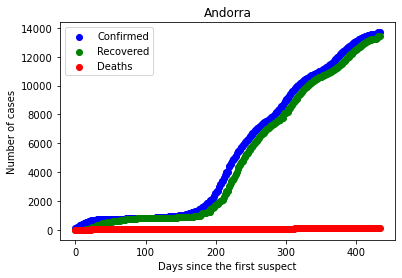

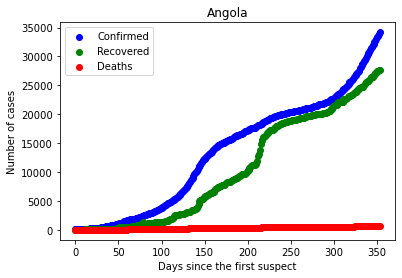

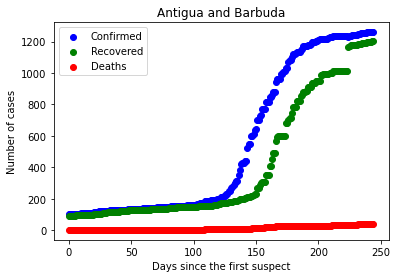

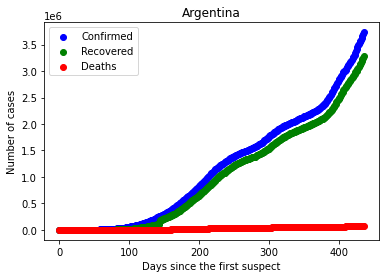

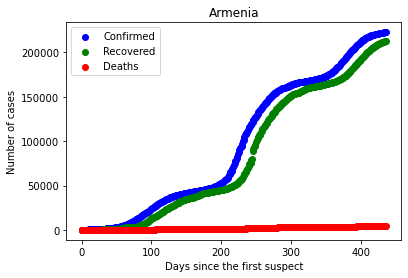

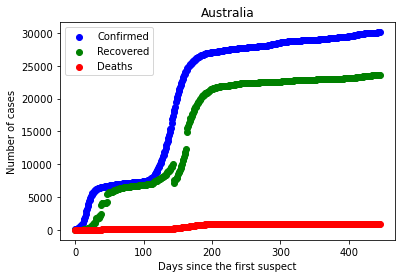

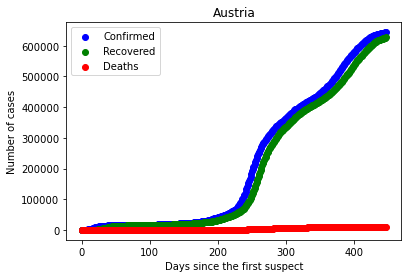

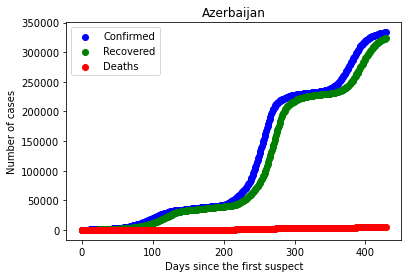

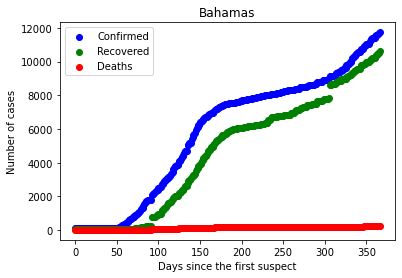

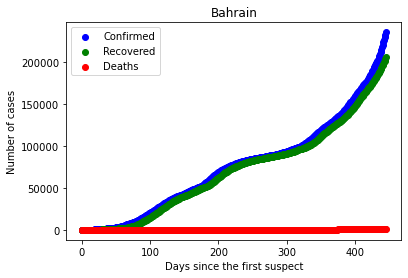

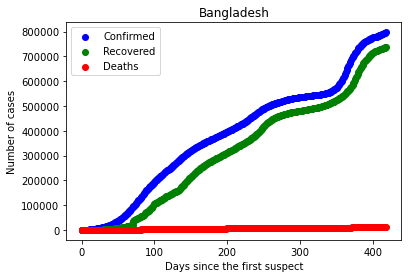

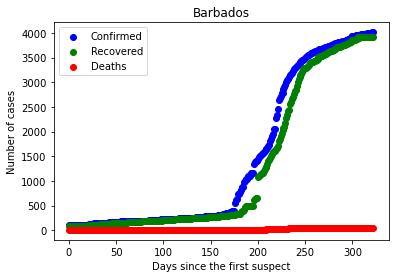

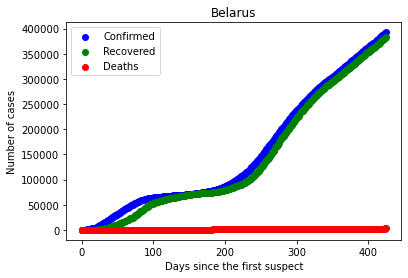

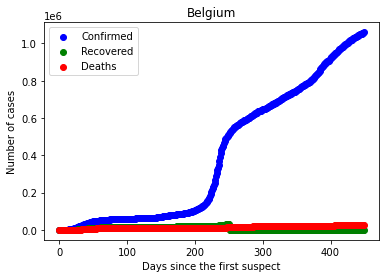

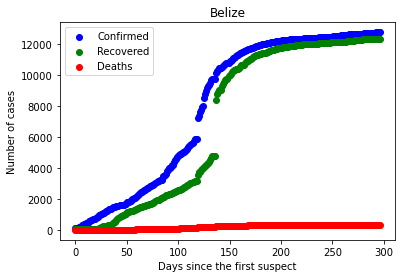

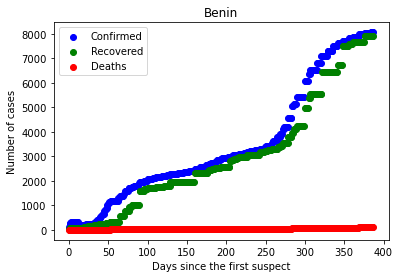

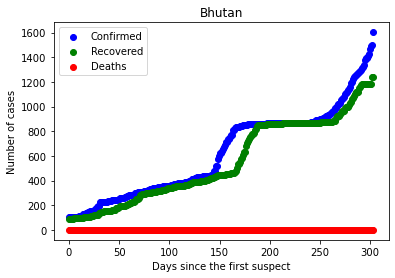

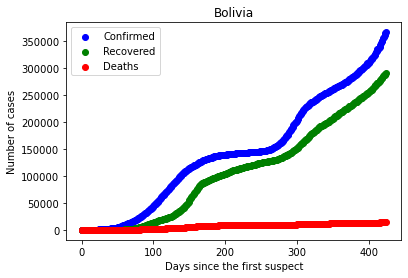

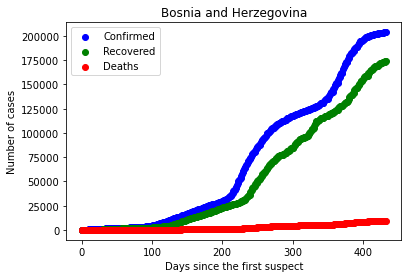

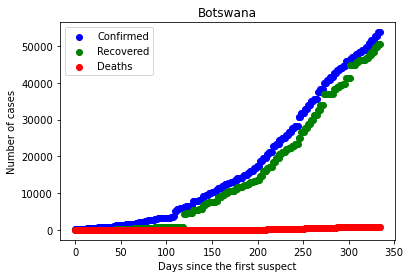

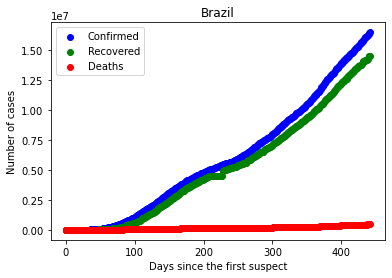

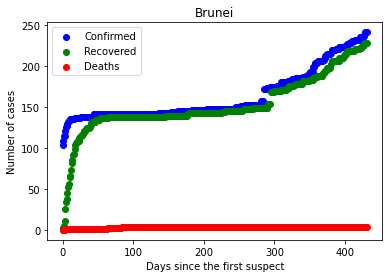

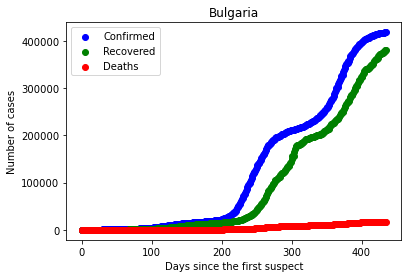

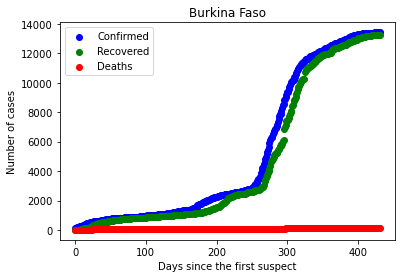

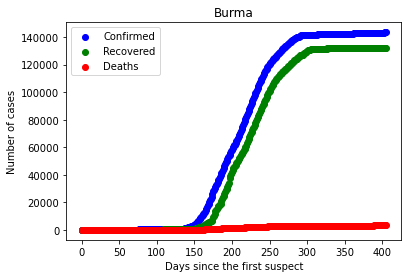

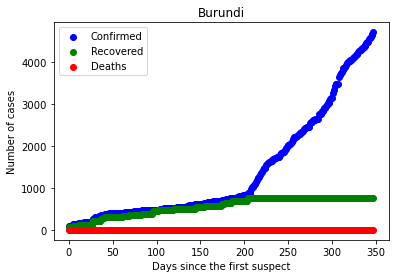

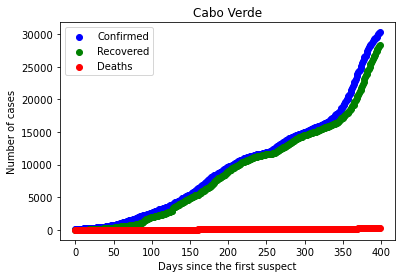

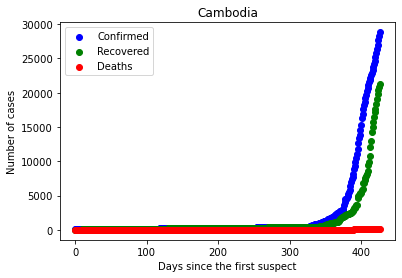

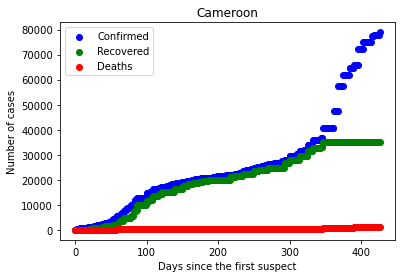

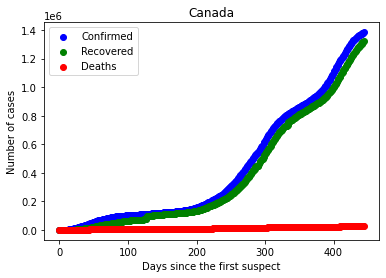

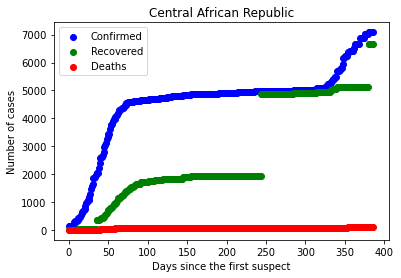

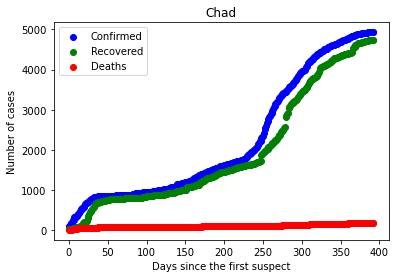

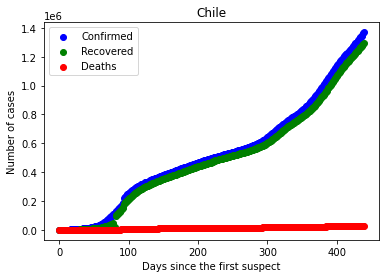

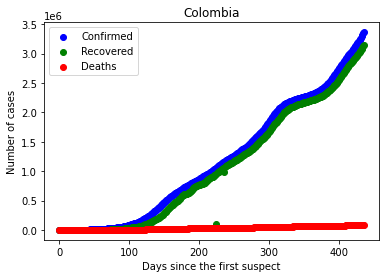

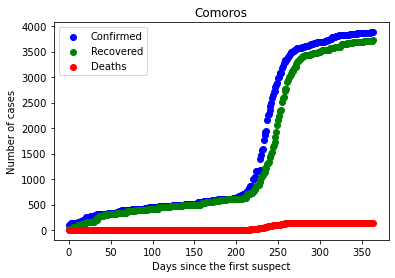

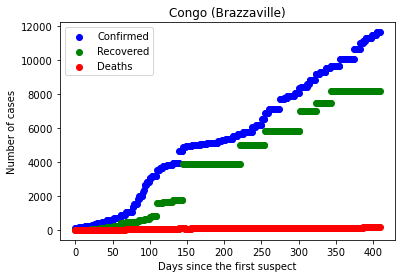

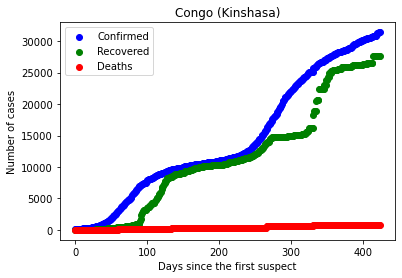

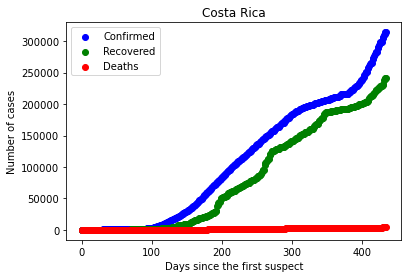

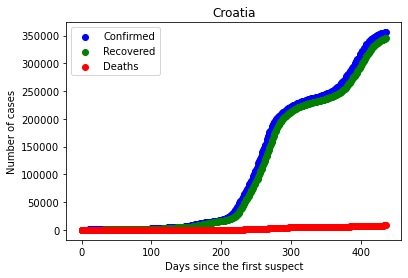

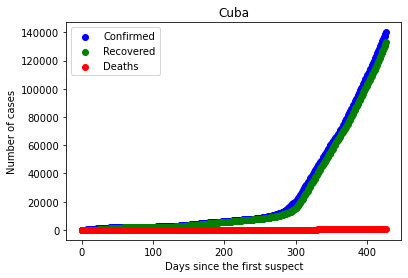

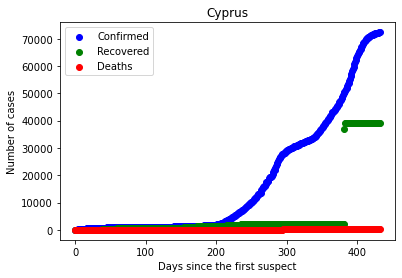

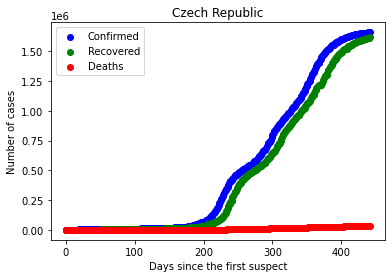

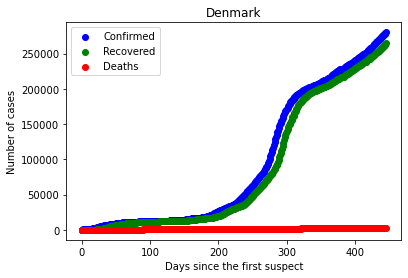

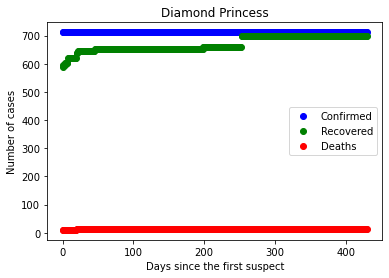

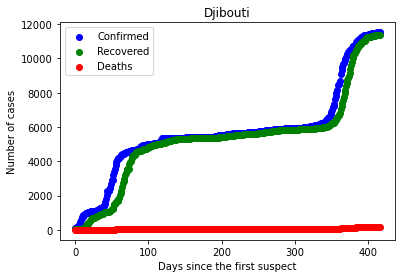

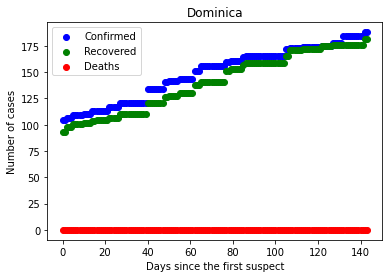

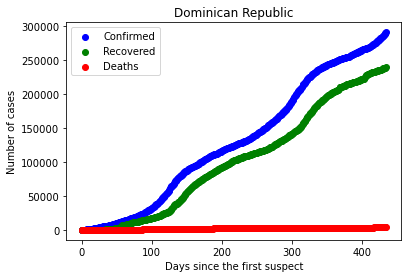

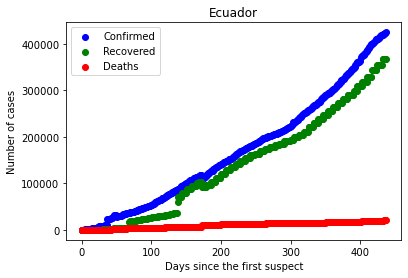

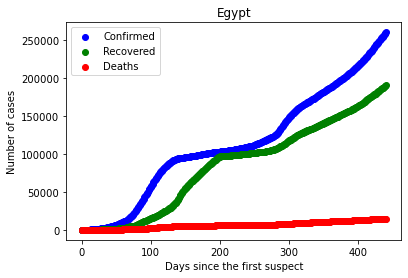

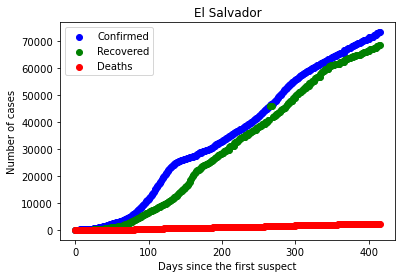

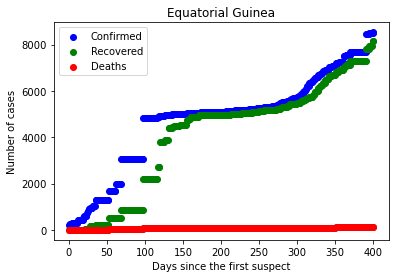

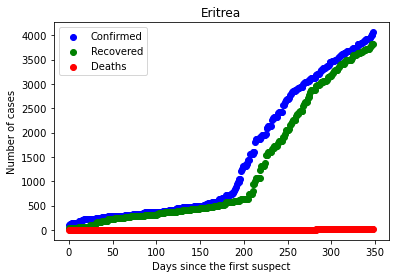

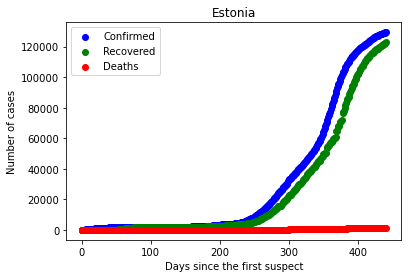

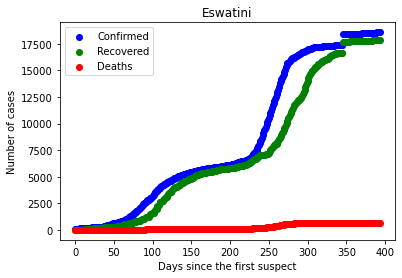

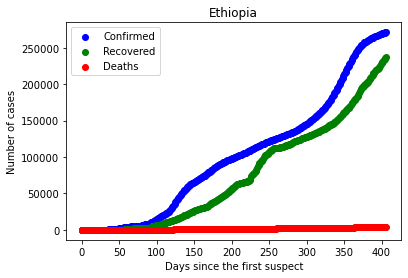

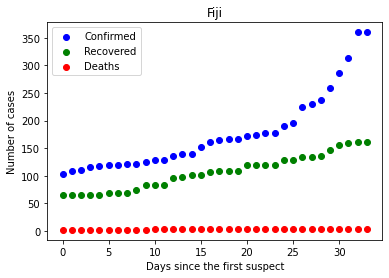

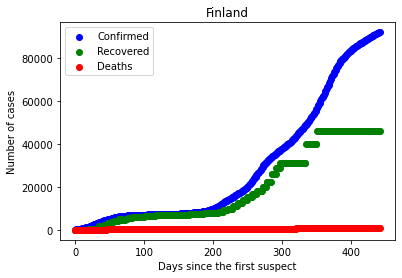

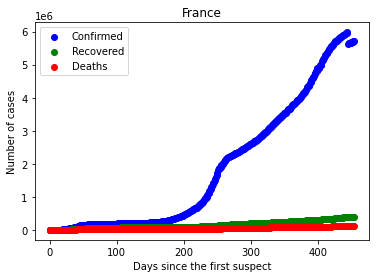

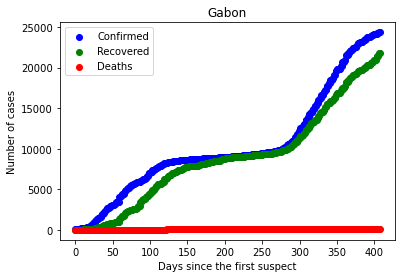

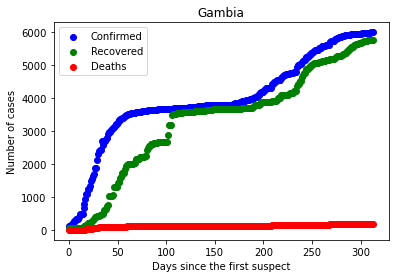

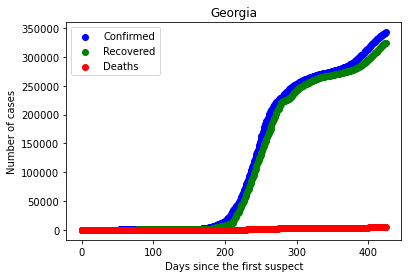

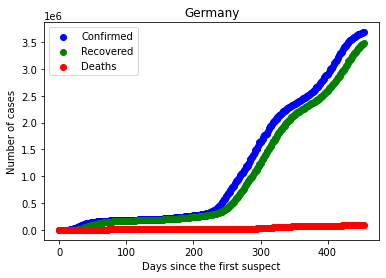

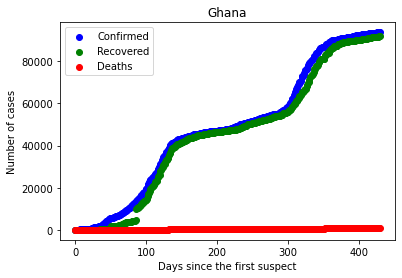

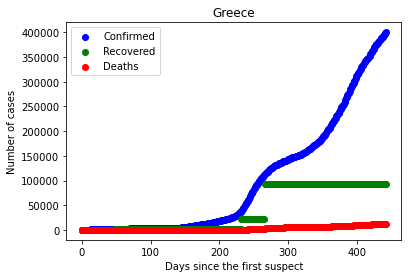

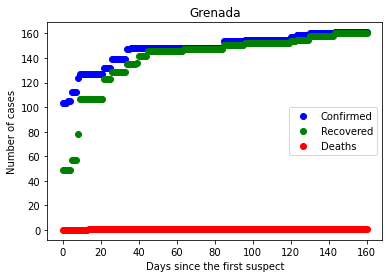

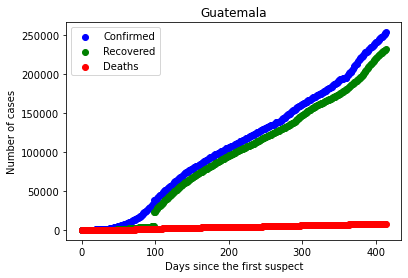

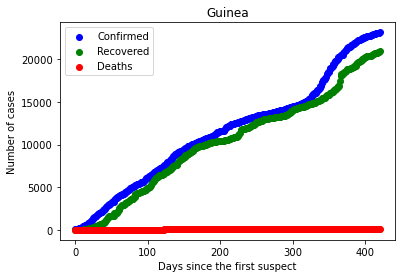

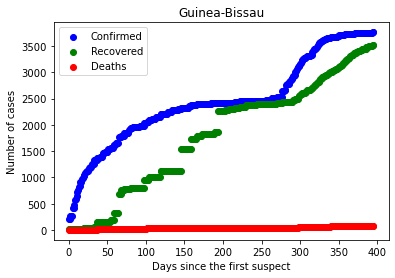

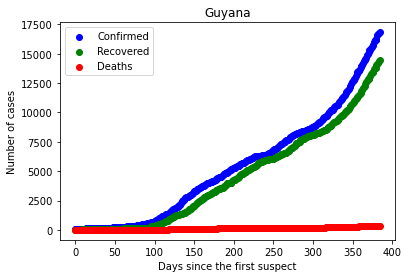

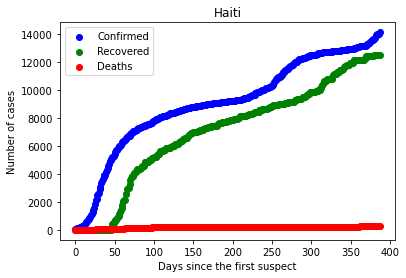

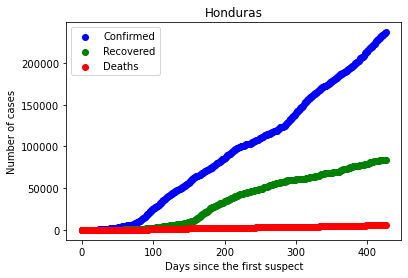

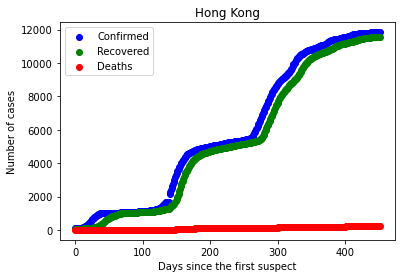

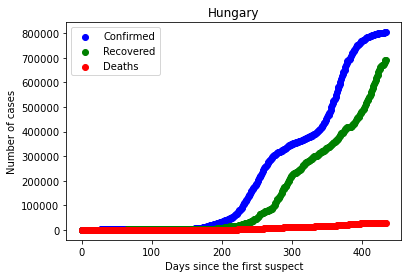

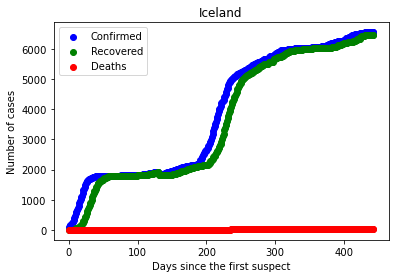

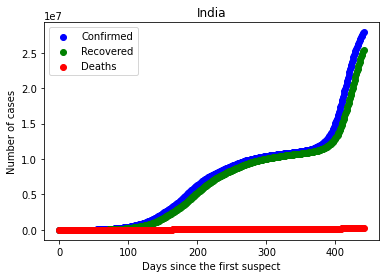

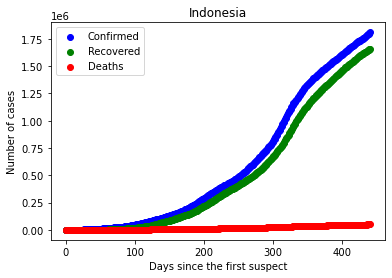

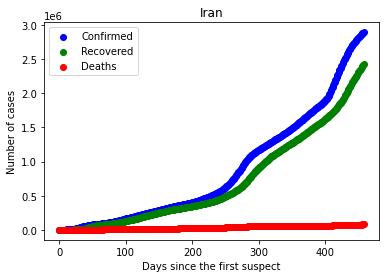

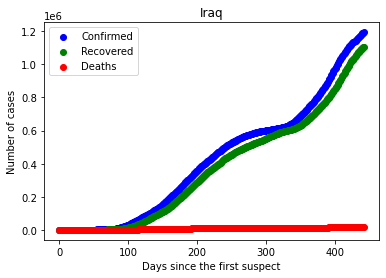

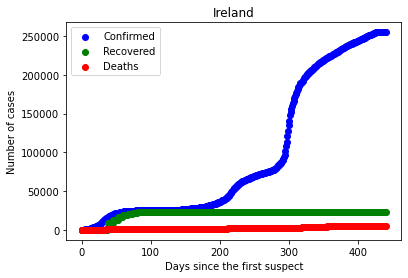

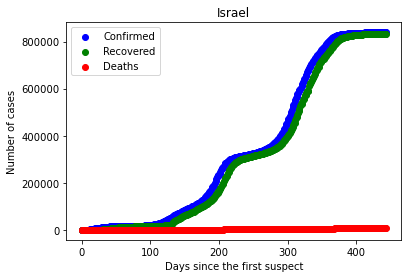

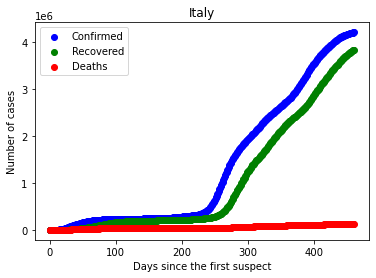

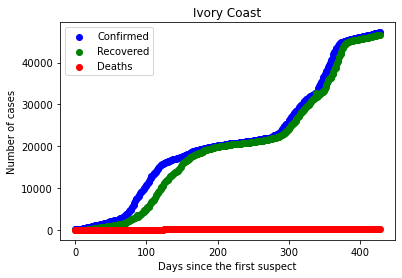

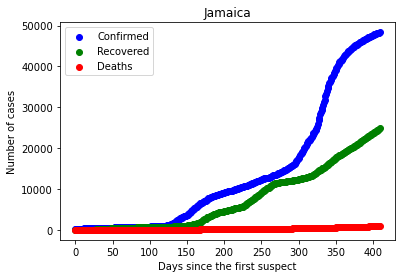

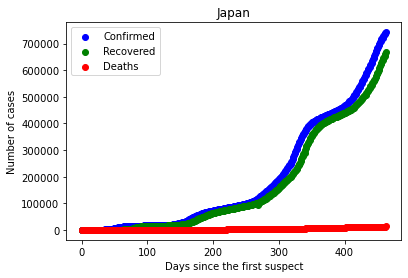

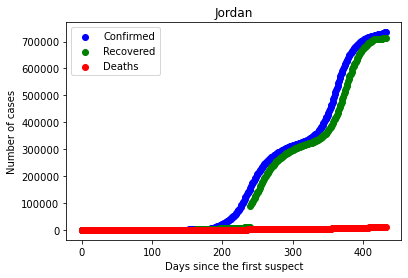

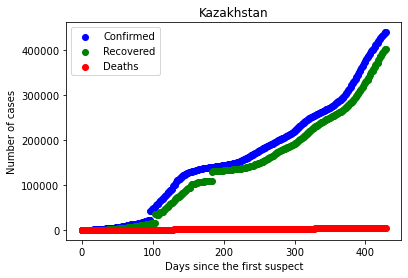

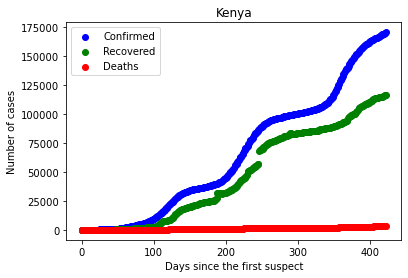

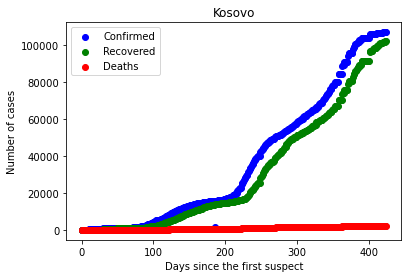

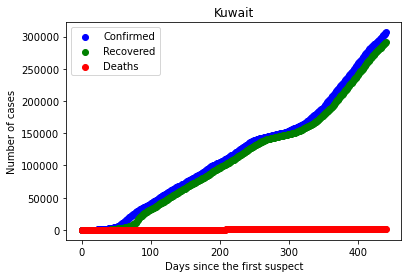

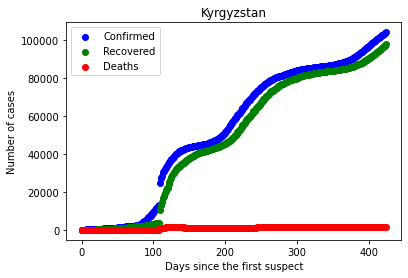

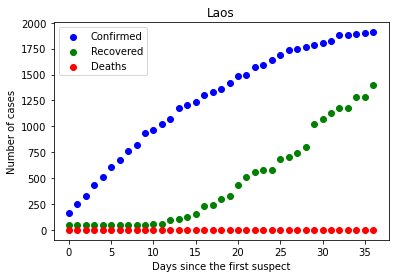

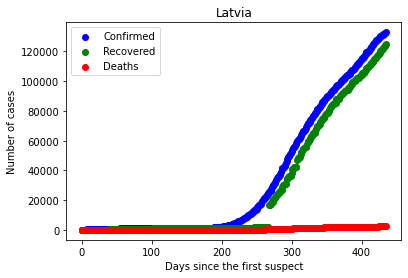

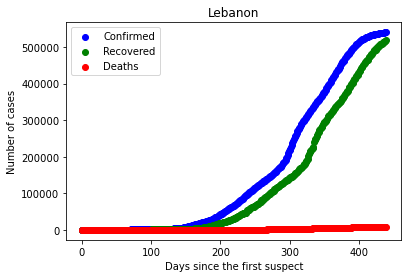

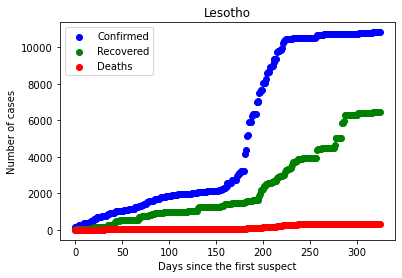

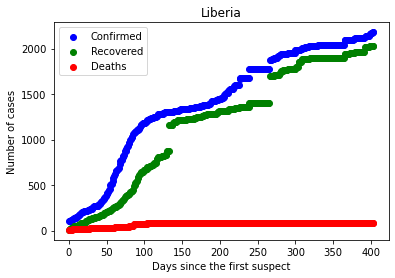

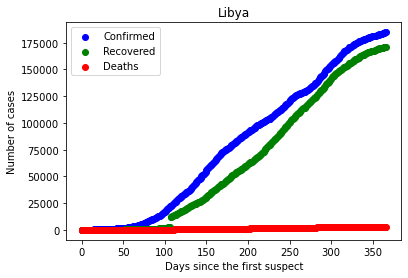

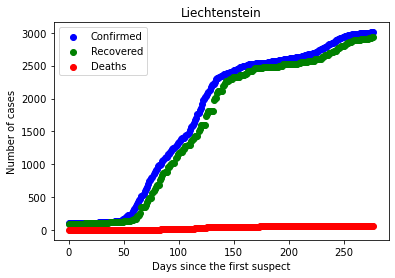

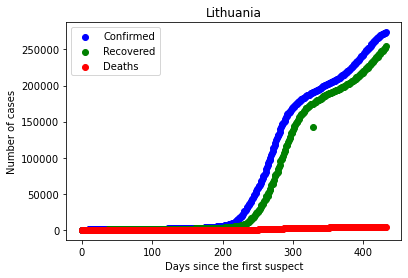

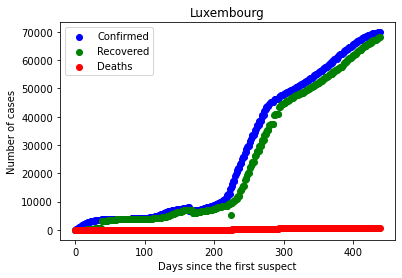

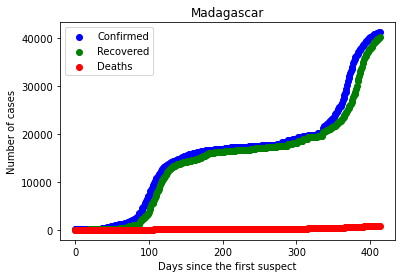

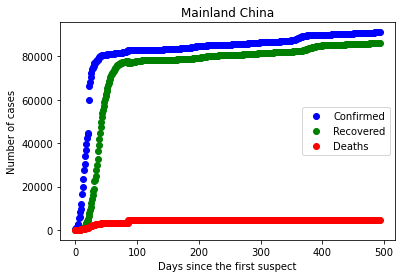

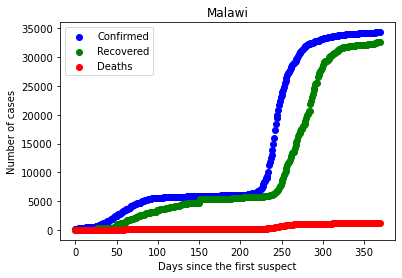

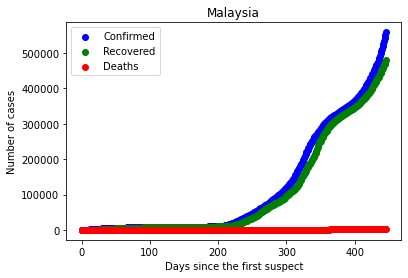

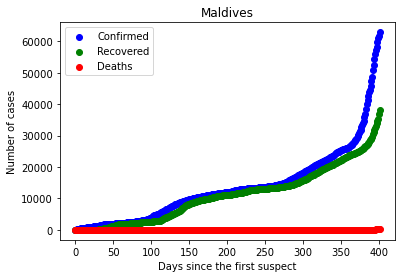

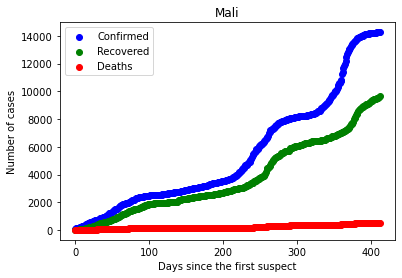

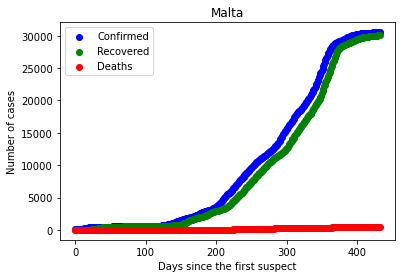

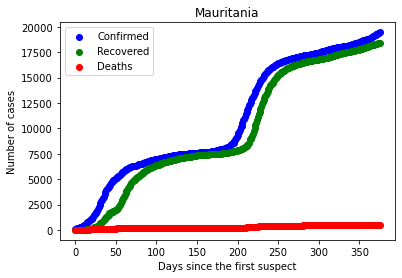

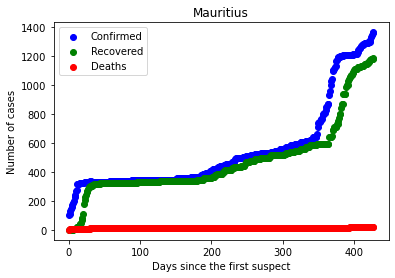

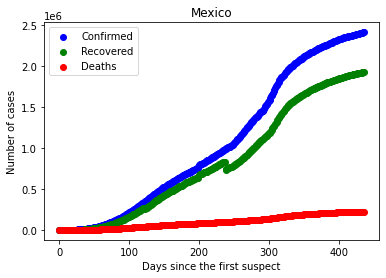

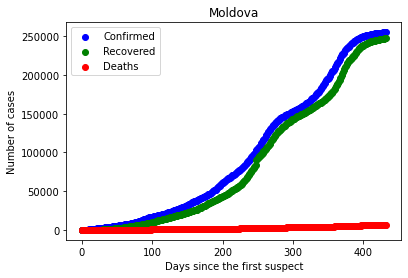

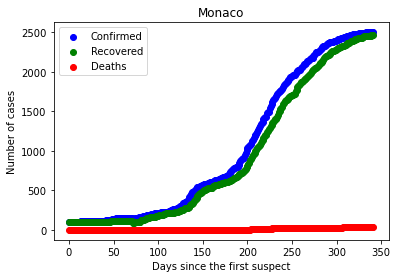

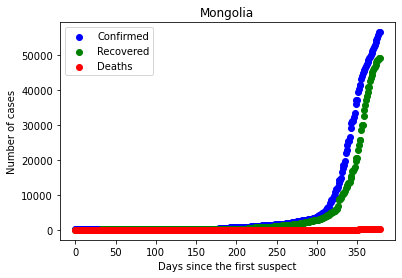

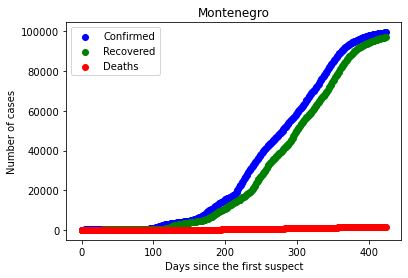

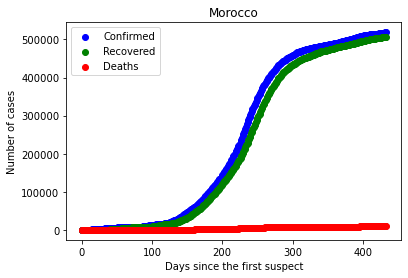

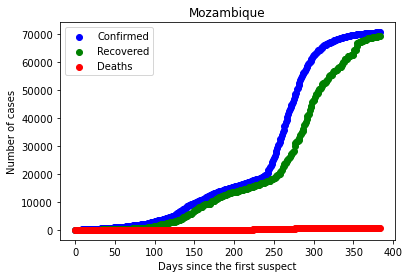

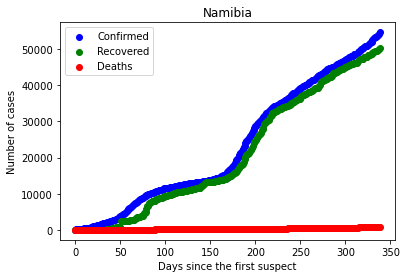

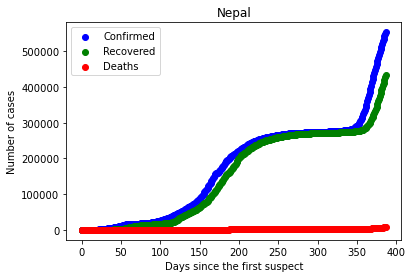

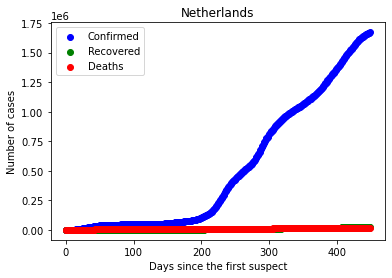

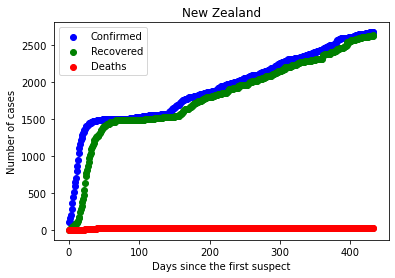

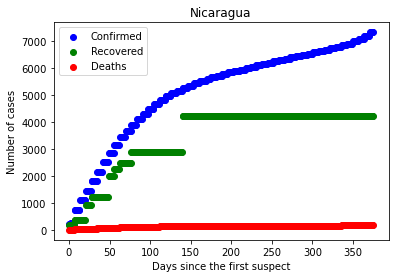

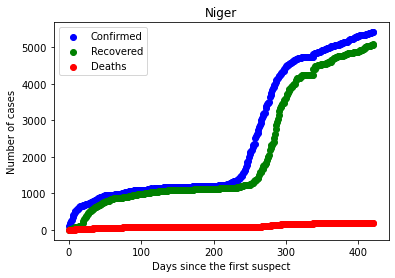

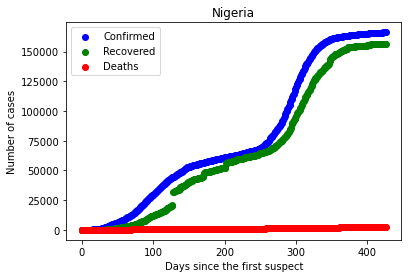

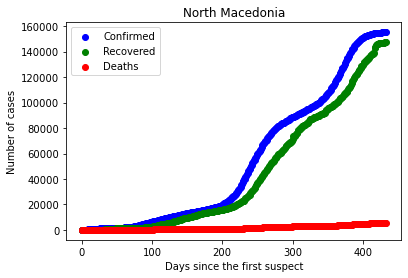

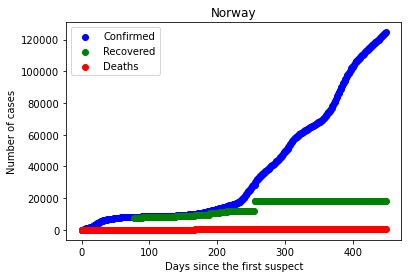

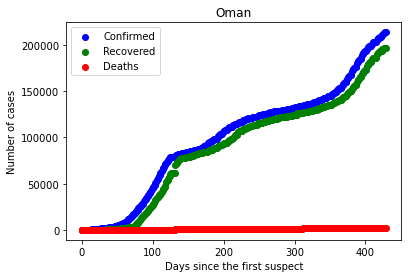

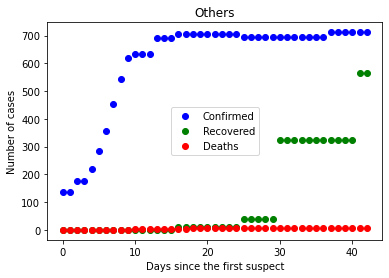

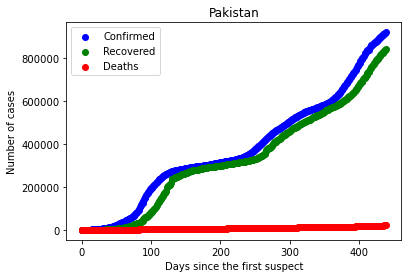

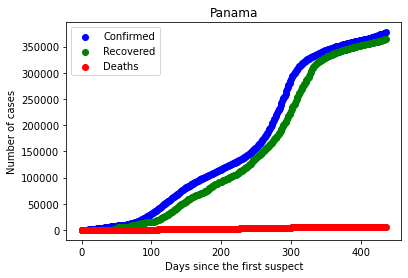

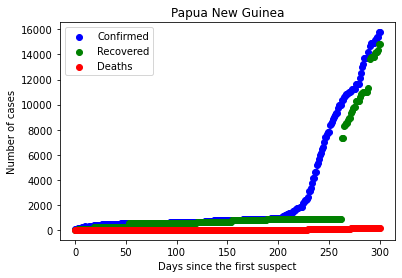

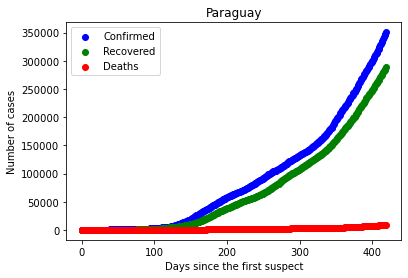

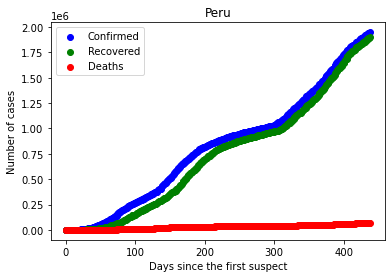

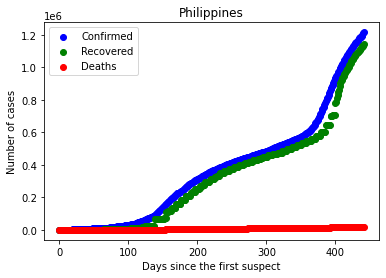

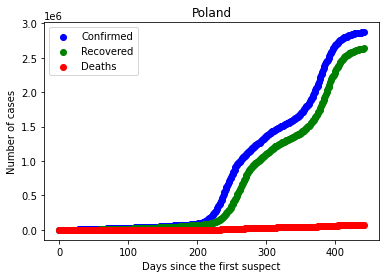

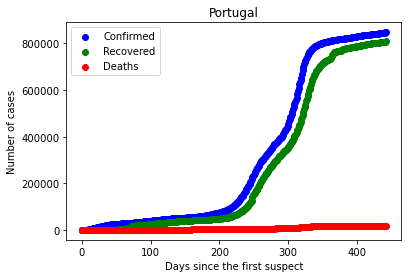

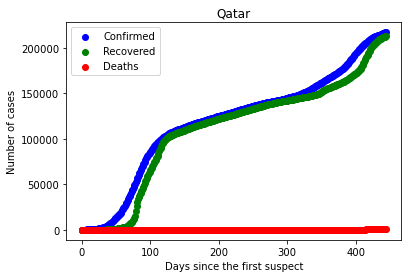

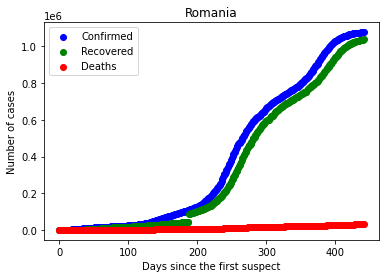

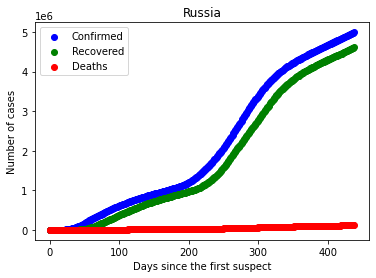

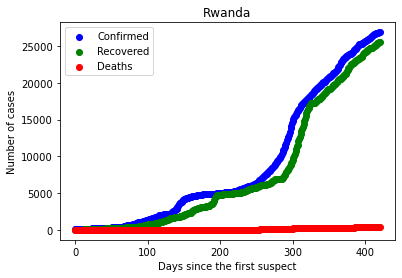

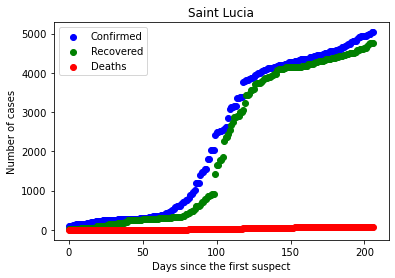

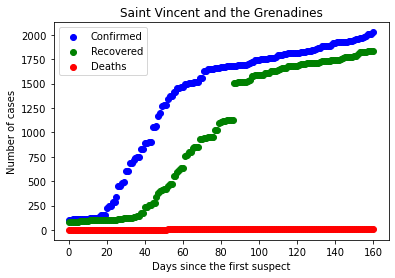

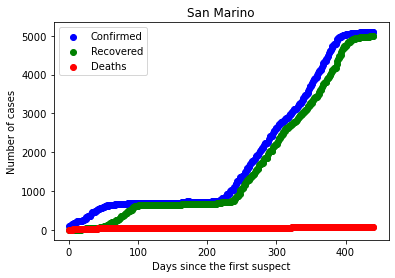

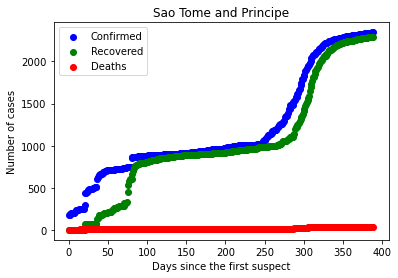

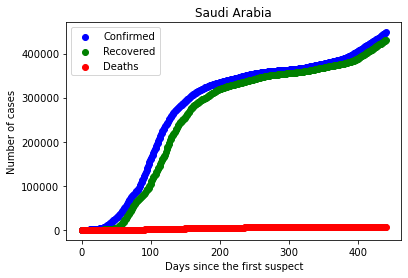

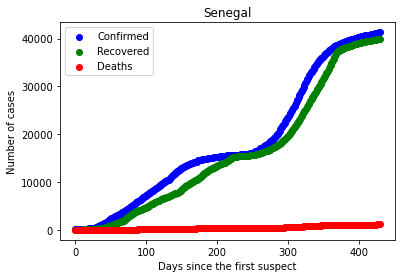

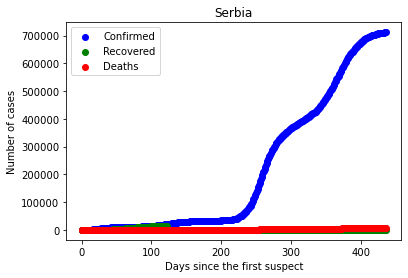

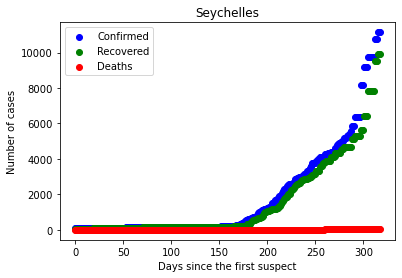

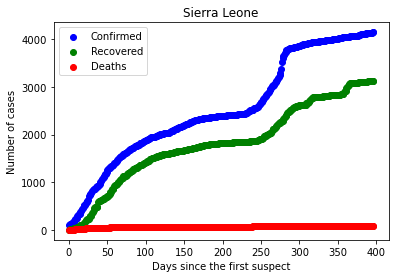

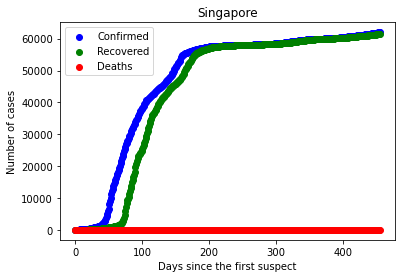

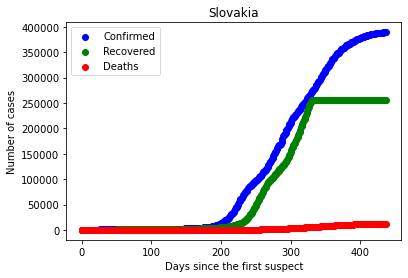

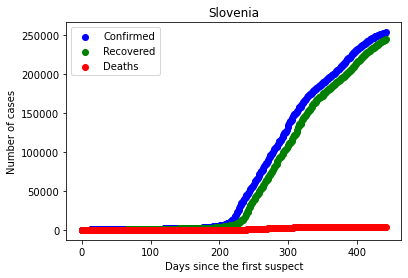

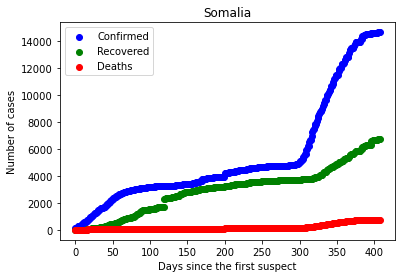

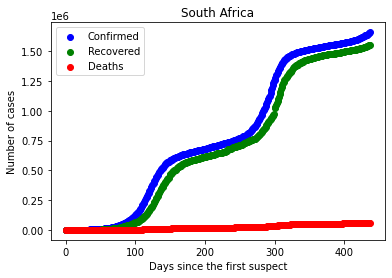

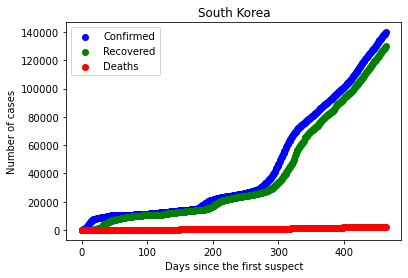

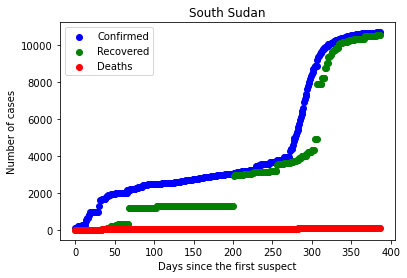

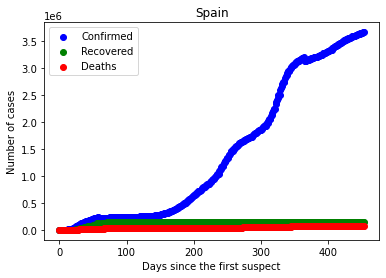

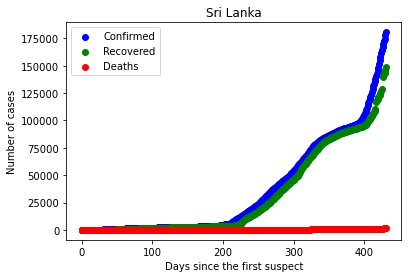

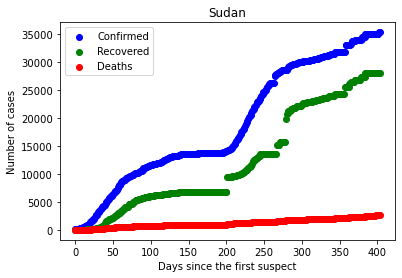

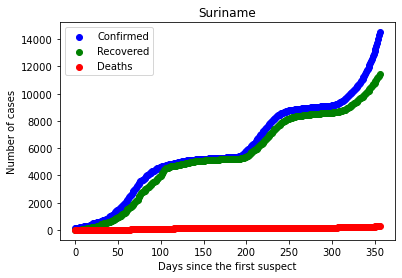

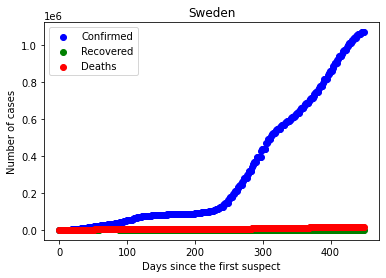

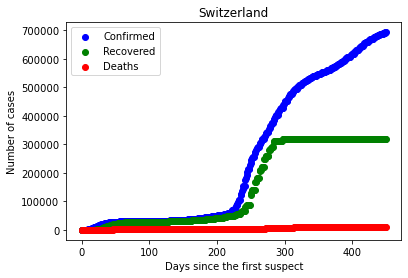

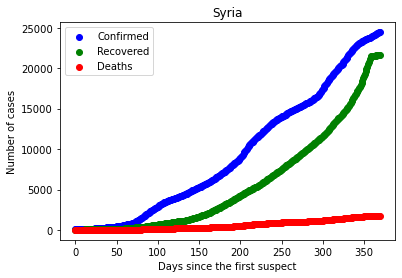

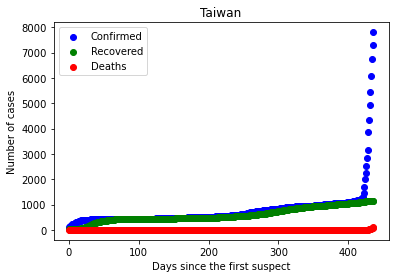

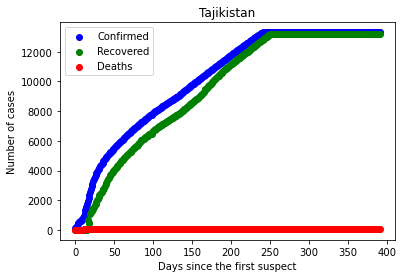

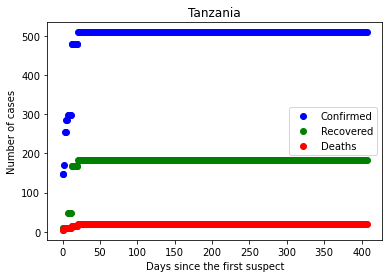

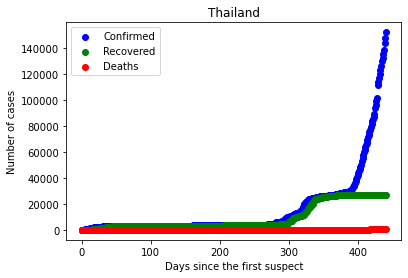

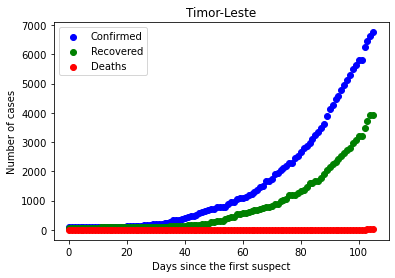

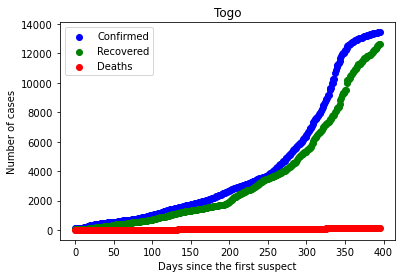

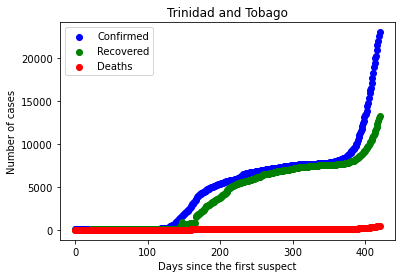

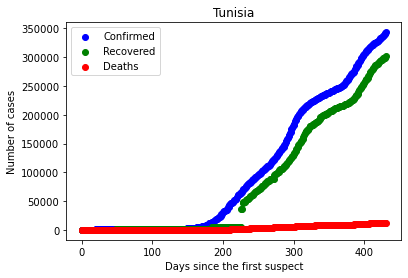

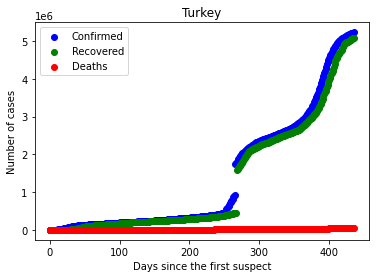

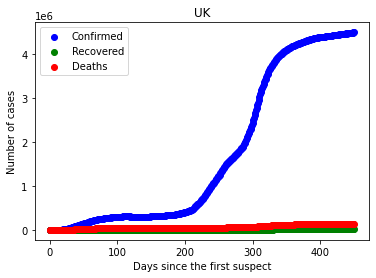

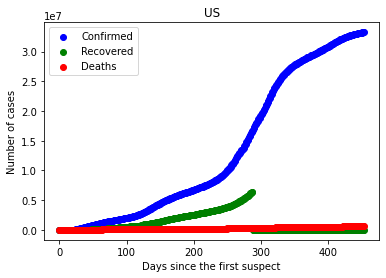

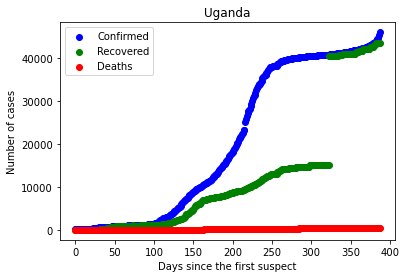

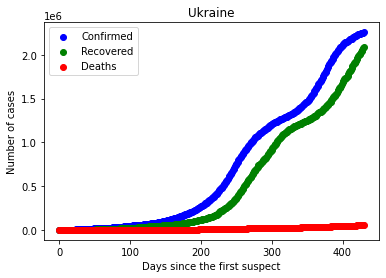

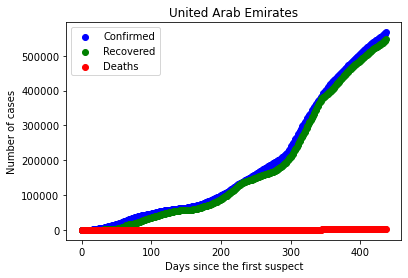

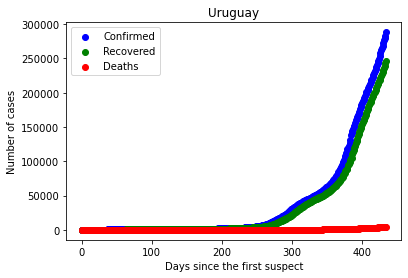

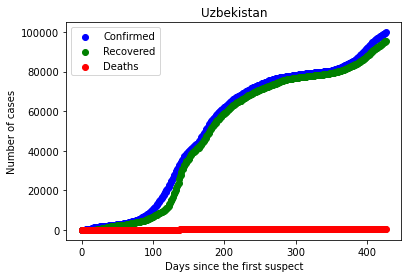

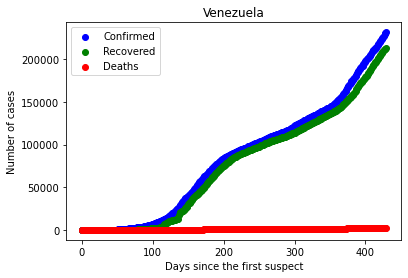

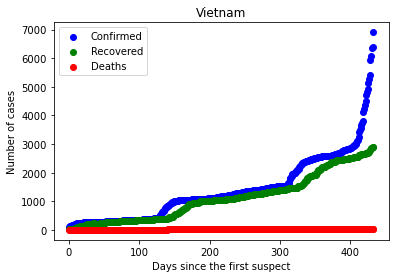

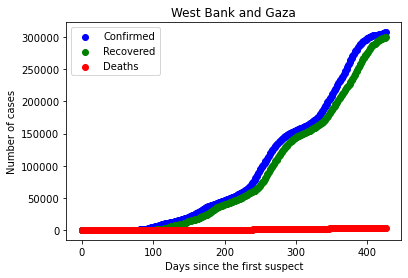

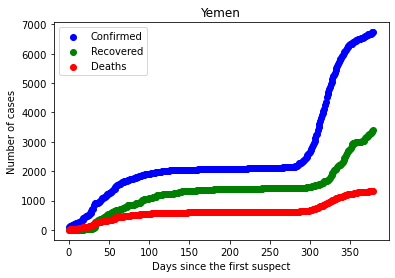

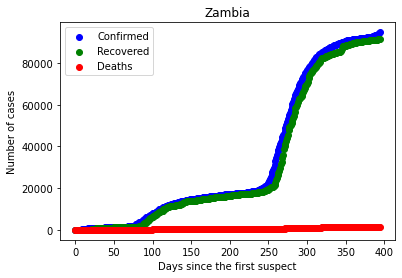

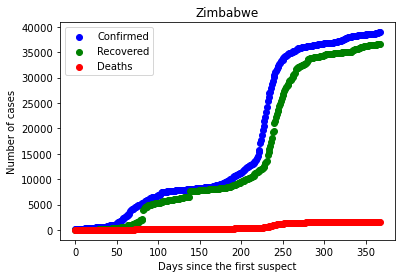

In [25]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [26]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

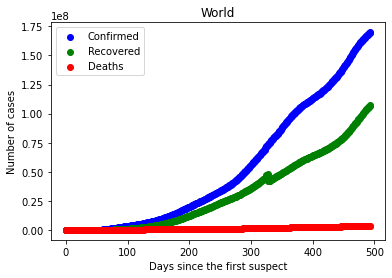

In [27]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

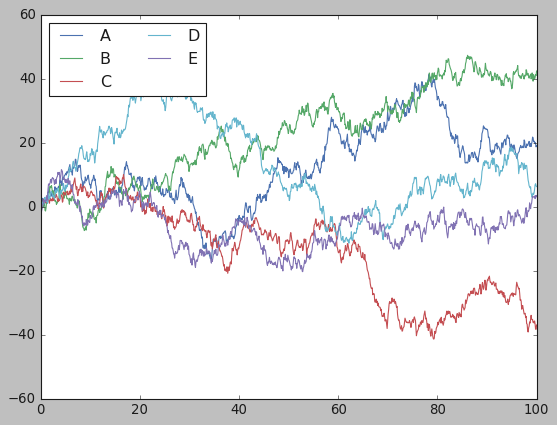

In [59]:
plt.style.use('classic')
x = np.linspace(0, 100, 1000)
y = np.cumsum(np.random.randn(1000, 5),0)
plt.plot(x, y)
plt.legend('ABCDE', ncol=2, loc='upper left')
plt.show()

# Seaborn learn

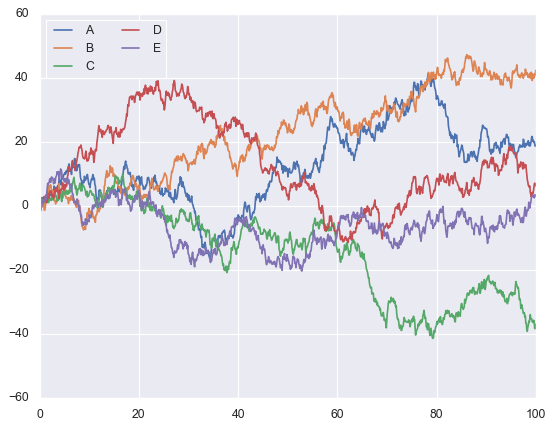

In [60]:
import seaborn as sns
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.show()

(array([2.92720214e-05, 3.04429023e-04, 9.42559091e-04, 2.44421379e-03,
        3.73510994e-03, 3.69998351e-03, 2.26272726e-03, 9.42559091e-04,
        2.34176172e-04, 4.09808300e-05]),
 array([160.51445517, 228.83908398, 297.1637128 , 365.48834161,
        433.81297042, 502.13759923, 570.46222805, 638.78685686,
        707.11148567, 775.43611448, 843.7607433 ]),
 <BarContainer object of 10 artists>)

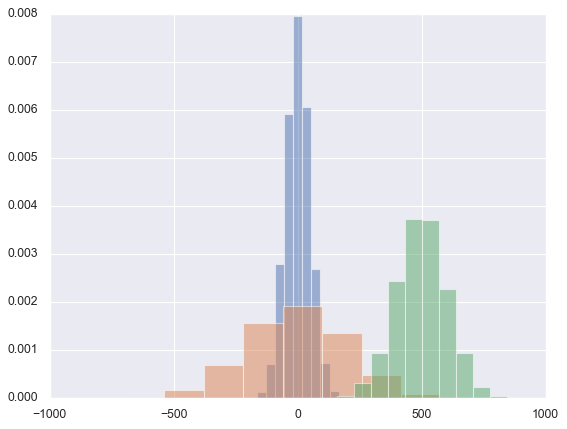

In [30]:
X = pd.Series(50*np.random.randn(5000))
Y = pd.Series(200*np.random.randn(5000))
Z = pd.Series(100*np.random.randn(5000)+500)
plt.hist(X,alpha=0.5,density=True)
plt.hist(Y,alpha=0.5,density=True)
plt.hist(Z,alpha=0.5,density=True)

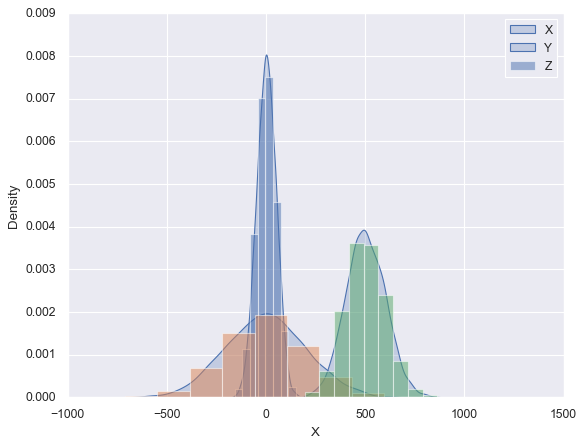

In [31]:
sns.set()
X = pd.Series(50*np.random.randn(5000))
Y = pd.Series(200*np.random.randn(5000))
Z = pd.Series(100*np.random.randn(5000)+500)
data = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
#data.head()
for col in data.columns:
    plt.hist(data[col], density=True,alpha=0.5,)
    plt.legend(('X','Y','Z'))
    sns.kdeplot(data[col], shade=True)
   

In [32]:
data.head()

X           Y           Z
0  11.650953 -191.530802  505.806443
1 -89.376923  -64.991941  412.123726
2  35.776045   17.799113  518.760435
3 -43.286617 -100.528808  569.955273
4  48.720691   21.531597  413.284147

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

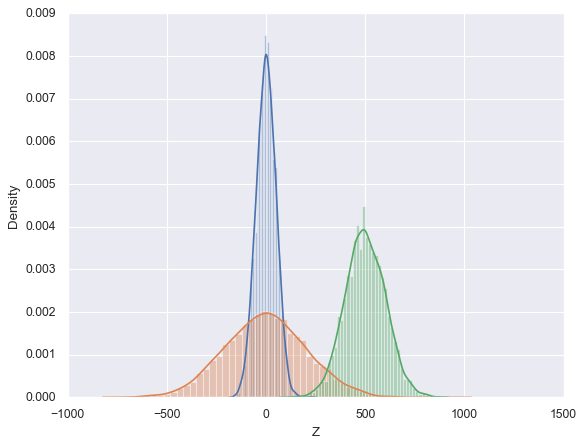

In [33]:
for col in data.columns:
    sns.distplot(data[col])
    

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


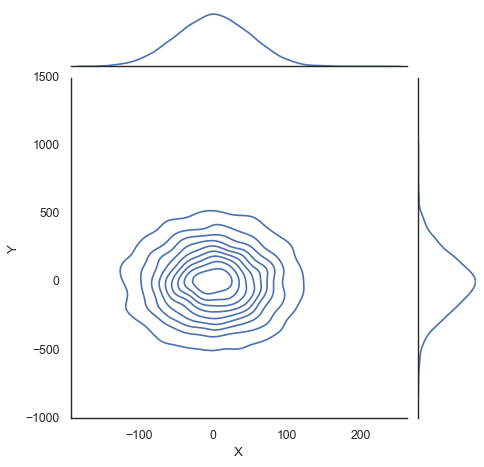

In [34]:
with sns.axes_style('white'):
    sns.jointplot("X", "Y", data, kind='kde')

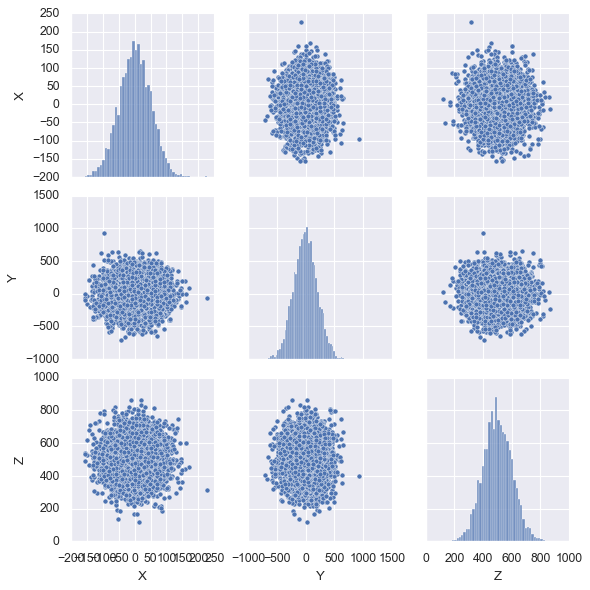

In [35]:
sns.pairplot(data)

In [36]:
iris = sns.load_dataset("iris")
iris.head(60)

sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
5            5.4          3.9           1.7          0.4      setosa
6            4.6          3.4           1.4          0.3      setosa
7            5.0          3.4           1.5          0.2      setosa
8            4.4          2.9           1.4          0.2      setosa
9            4.9          3.1           1.5          0.1      setosa
10           5.4          3.7           1.5          0.2      setosa
11           4.8          3.4           1.6          0.2      setosa
12           4.8          3.0           1.4          0.1      setosa
13           4.3          3.0           1.1          0.1      setosa
14           5.8          4.0           1.2          0.2      setosa
15           5.7          4.4           1.5          0.4      setosa
16           5.4          3.9           1.3          0.4      setosa
17           5.1          3.5           1.4          0.3      setosa
18           5.7          3.8           1.7          0.3      setosa
19           5.1          3.8           1.5          0.3      setosa
20           5.4          3.4           1.7          0.2      setosa
21           5.1          3.7           1.5          0.4      setosa
22           4.6          3.6           1.0          0.2      setosa
23           5.1          3.3           1.7          0.5      setosa
24           4.8          3.4           1.9          0.2      setosa
25           5.0          3.0           1.6          0.2      setosa
26           5.0          3.4           1.6          0.4      setosa
27           5.2          3.5           1.5          0.2      setosa
28           5.2          3.4           1.4          0.2      setosa
29           4.7          3.2           1.6          0.2      setosa
30           4.8          3.1           1.6          0.2      setosa
31           5.4          3.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
34           4.9          3.1           1.5          0.2      setosa
35           5.0          3.2           1.2          0.2      setosa
36           5.5          3.5           1.3          0.2      setosa
37           4.9          3.6           1.4          0.1      setosa
38           4.4          3.0           1.3          0.2      setosa
39           5.1          3.4           1.5          0.2      setosa
40           5.0          3.5           1.3          0.3      setosa
41           4.5          2.3           1.3          0.3      setosa
42           4.4          3.2           1.3          0.2      setosa
43           5.0          3.5           1.6          0.6      setosa
44           5.1          3.8           1.9          0.4      setosa
45           4.8          3.0           1.4          0.3      setosa
46           5.1          3.8           1.6          0.2      setosa
47           4.6          3.2           1.4          0.2      setosa
48           5.3          3.7           1.5          0.2      setosa
49           5.0          3.3           1.4          0.2      setosa
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
55           5.7          2.8           4.5          1.3  versicolor
56           6.3          3.3           4.7          1.6  versicolor
57

In [37]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [38]:
iris.shape

(150, 5)

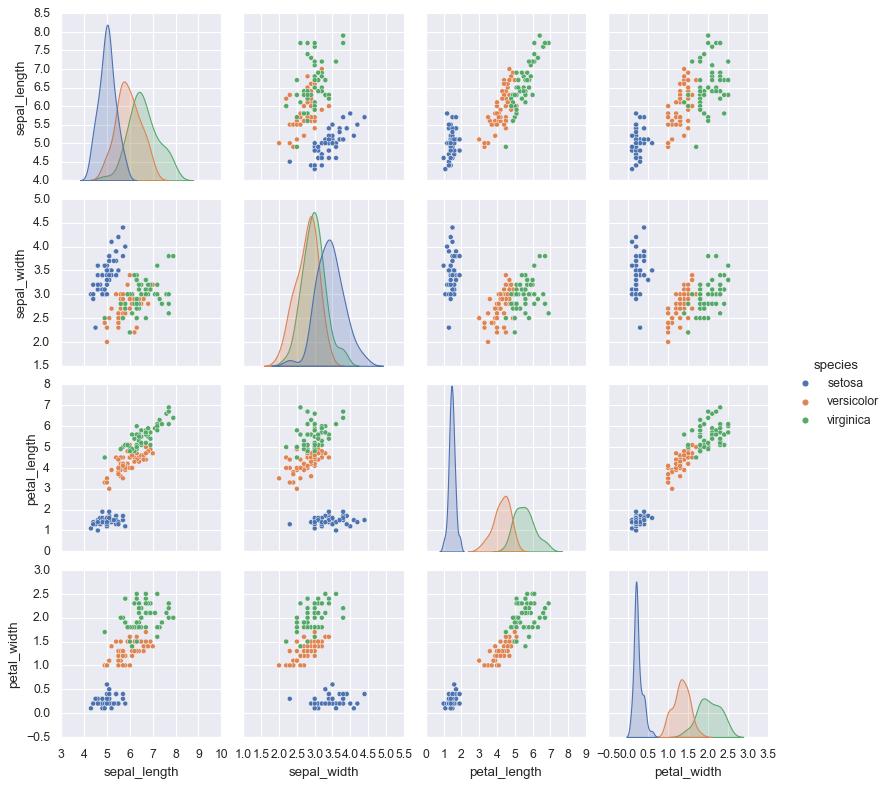

In [39]:
sns.pairplot(iris,hue='species')

# Bokeh learn

In [40]:
from bokeh.plotting import figure, output_file, show

In [41]:
output_file("demo.html")
p = figure(plot_width=800,plot_height=400,title="line")
p.line([1,2,3,4,5],[6,7,8,9,10],line_width=2)
show(p)

In [42]:
p = figure(plot_width=800,plot_height=400,title="Bokeh Example", x_axis_label='X', y_axis_label='Y')
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)
p.line(x, y1, legend="y=sin(x)")
p.circle(x, x, legend="y=x", fill_color="green",size=5)
p.line(x, y2, legend="y=cos", line_width=3,line_color="red")
p.triangle(x,x**2,color="black")
show(p)

In [43]:
from bokeh.layouts import gridplot

x = np.linspace(0, 6*np.pi, 100)
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)-1

s1 = figure(plot_width = 400)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

s2 = figure(plot_width = 400)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

s3 = figure(plot_width = 400)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

p = gridplot([[s1, s2, s3]])

show(p)

# Machine Learning: Scikit-Learn 

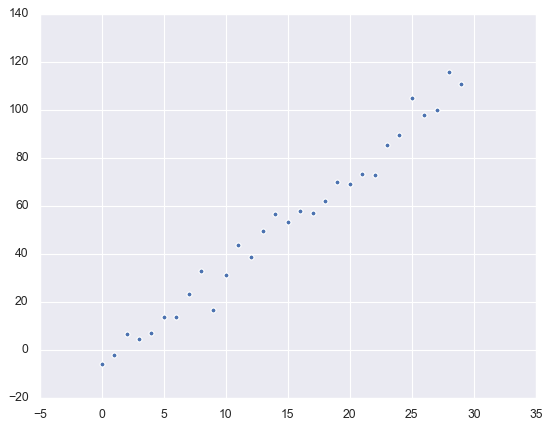

In [45]:
N = 30
x = np.arange(N)
y = 4 * x - 7 + (5*np.random.randn(N))
plt.scatter(x, y)
plt.show()

In [46]:
x.shape

(30,)

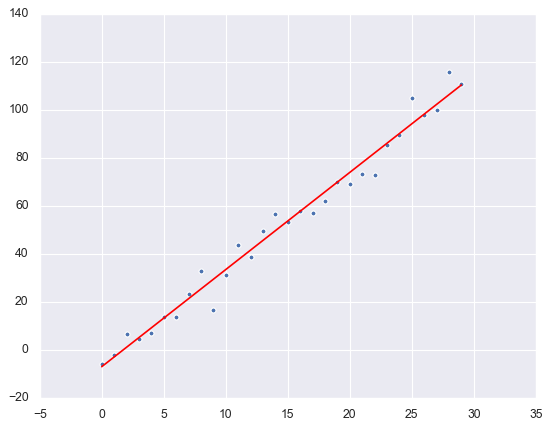

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
yfit = model.predict(x[:, np.newaxis])
plt.scatter(x, y)
plt.plot(x, yfit,color='red');

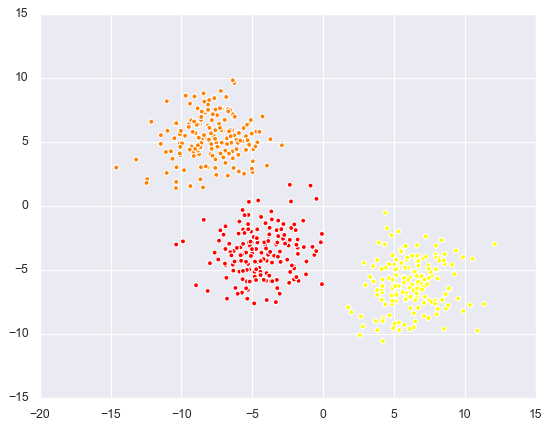

In [77]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=500, centers=3,cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap='autumn');

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [79]:
from sklearn.svm import SVC

In [80]:
md1 = SVC(gamma = 'auto')
md1.fit(X_train,y_train)

SVC(gamma='auto')

In [81]:
y_predict = md1.predict(X_test)

In [82]:
acc = 100*np.sum(y_predict == y_test)/y_test.size
print("Accuracy is :", acc, "%")

Accuracy is : 100.0 %


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
md1 = RandomForestClassifier(n_estimators = 20)
md1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [85]:
y_predict = md1.predict(X_test)
acc = 100*np.sum(y_predict == y_test)/y_test.size
print("Accuracy is :", acc, "%")

Accuracy is : 100.0 %
